In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import transformers
import re
import torch

In [47]:
df_train = pd.DataFrame()
df_train["Sentences"] = []
df_train["Sentiment"] = []
df_train
for dirname, _, filenames in os.walk('train/neg'):
    print(len(filenames))
    for file in filenames:
        with open(os.path.join(dirname, file), 'r') as file:
            review = file.read().strip()
            review = re.sub('<.*?>', '', review)
        df_train.loc[len(df_train.index)] = [review, 0]
for dirname, _, filenames in os.walk('train/pos'):
    print(len(filenames))
    for file in filenames:
        with open(os.path.join(dirname, file), 'r') as file:
            review = file.read().strip()
            review = re.sub('<.*?>', '', review)
        df_train.loc[len(df_train.index)] = [review, 1]
    

12500
12500


In [48]:
df_train

,Sentences,Sentiment
0,Working with one of the best Shakespeare sourc...,0
1,"Well...tremors I, the original started off in ...",0
2,Ouch! This one was a bit painful to sit throug...,0
3,"I've seen some crappy movies in my life, but t...",0
4,"""Carriers"" follows the exploits of two guys an...",0
...,...,...
24995,About a year ago I finally gave up on American...,1
24996,When I saw the elaborate DVD box for this and ...,1
24997,"Last November, I had a chance to see this film...",1
24998,Great movie -I loved it. Great editing and use...,1


In [49]:
df_test = pd.DataFrame()
df_test["Sentences"] = []
df_test["Sentiment"] = []
df_test
for dirname, _, filenames in os.walk('test/neg'):
    print(len(filenames))
    for file in filenames:
        with open(os.path.join(dirname, file), 'r') as file:
            review = file.read().strip()
            review = re.sub('<.*?>', '', review)
        df_test.loc[len(df_test.index)] = [review, 0]
for dirname, _, filenames in os.walk('test/pos'):
    print(len(filenames))
    for file in filenames:
        with open(os.path.join(dirname, file), 'r') as file:
            review = file.read().strip()
            review = re.sub('<.*?>', '', review)
        df_test.loc[len(df_test.index)] = [review, 1]

12500
12500


In [50]:
df_test

,Sentences,Sentiment
0,Alan Rickman & Emma Thompson give good perform...,0
1,I have seen this movie and I did not care for ...,0
2,"In Los Angeles, the alcoholic and lazy Hank Ch...",0
3,"This film is bundled along with ""Gli fumavano ...",0
4,I only comment on really very good films and o...,0
...,...,...
24995,"This movie is certainly well-constructed, begi...",1
24996,Nice to see a comedy for grown ups. Masterfull...,1
24997,Jean Renoir's homage to the Paris of the late ...,1
24998,What are the movies? I mean.. what are movies ...,1


In [61]:
train_texts, train_labels = df_train["Sentences"], df_train["Sentiment"]
test_texts, test_labels = df_test["Sentences"], df_test["Sentiment"]

len(train_texts), len(train_labels), len(test_texts), len(test_labels)

(25000, 25000, 25000, 25000)

In [71]:
train_texts[0]

"Working with one of the best Shakespeare sources, this film manages to be creditable to it's source, whilst still appealing to a wider audience.Branagh steals the film from under Fishburne's nose, and there's a talented cast on good form."

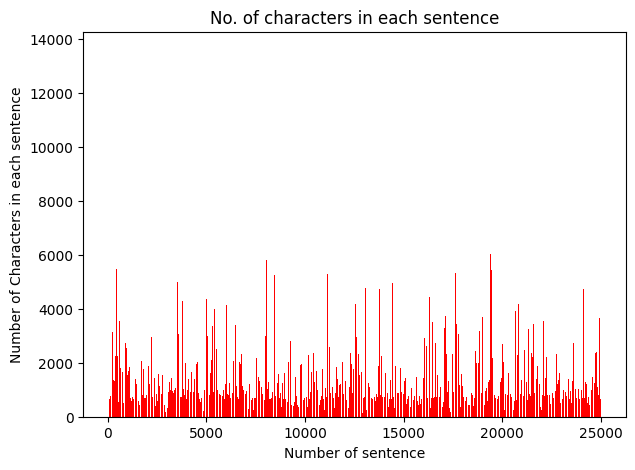

In [64]:
sentences = [len(sent) for sent in train_texts]

plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})
plt.bar(range(1,25001), sentences, color = ['red'])
plt.gca().set(title='No. of characters in each sentence', xlabel='Number of sentence', ylabel='Number of Characters in each sentence');

In [69]:
from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)
train_tokens = list(map(lambda t: ['[CLS]'] + tokenizer.tokenize(t) + ['[SEP]'], train_texts))
test_tokens = list(map(lambda t: ['[CLS]'] + tokenizer.tokenize(t) + ['[SEP]'], test_texts))

len(train_tokens), len(test_tokens)

(25000, 25000)

In [70]:
print(train_tokens[0])

['[CLS]', 'working', 'with', 'one', 'of', 'the', 'best', 'shakespeare', 'sources', ',', 'this', 'film', 'manages', 'to', 'be', 'credit', '##able', 'to', 'it', "'", 's', 'source', ',', 'whilst', 'still', 'appealing', 'to', 'a', 'wider', 'audience', '.', 'bran', '##agh', 'steals', 'the', 'film', 'from', 'under', 'fish', '##burn', '##e', "'", 's', 'nose', ',', 'and', 'there', "'", 's', 'a', 'talented', 'cast', 'on', 'good', 'form', '.', '[SEP]']
